# Check python versions

In [2]:
import sys
print('Python: {}'.format(sys.version))

import scipy
print('SciPy: {}'.format(scipy.__version__))

import numpy
print("Numpy: {}".format(numpy.__version__))

import matplotlib
print("Matplotlib: {}".format(matplotlib.__version__))

import pandas
print("Pandas: {}".format(pandas.__version__))

import sklearn
print("SkLearn: {}".format(sklearn.__version__))

Python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
SciPy: 1.13.1
Numpy: 1.26.4
Matplotlib: 3.8.4
Pandas: 2.2.2
SkLearn: 1.4.2


# Load Dataset

In [4]:
penguins_dataset = pandas.read_csv('penguins.csv')
penguins_dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
penguins_dataset.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
penguins_dataset.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

In [7]:
penguins_dataset = penguins_dataset.dropna()
penguins_dataset.count()

species              333
island               333
bill_length_mm       333
bill_depth_mm        333
flipper_length_mm    333
body_mass_g          333
sex                  333
dtype: int64

In [8]:
penguins_dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
penguins_dataset.groupby('species').size()

species
Adelie       146
Chinstrap     68
Gentoo       119
dtype: int64

bill_length_mm          Axes(0.125,0.53;0.352273x0.35)
bill_depth_mm        Axes(0.547727,0.53;0.352273x0.35)
flipper_length_mm       Axes(0.125,0.11;0.352273x0.35)
body_mass_g          Axes(0.547727,0.11;0.352273x0.35)
dtype: object

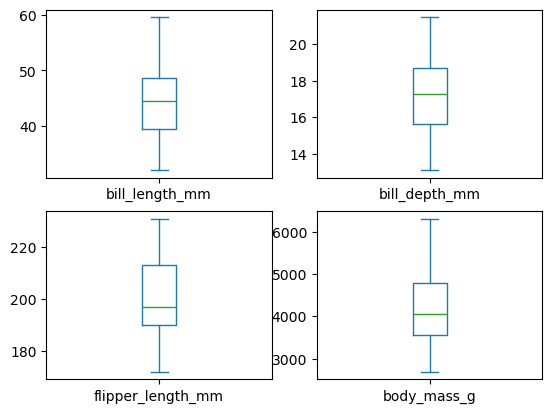

In [10]:
penguins_dataset.plot(kind='box', subplots = True, layout = (2, 2), sharex = False, sharey = False)

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

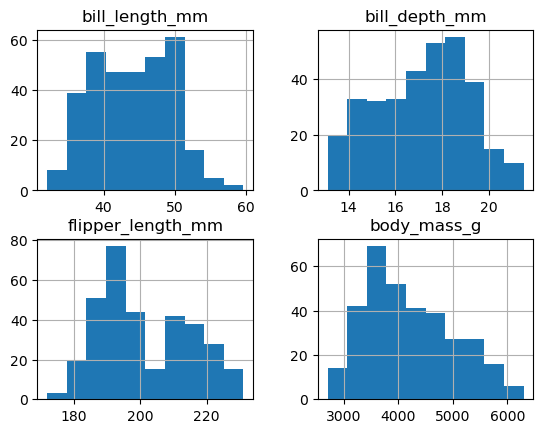

In [11]:
penguins_dataset.hist()

array([[<Axes: xlabel='bill_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_depth_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>,
        <Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>,
        <Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>,
        <

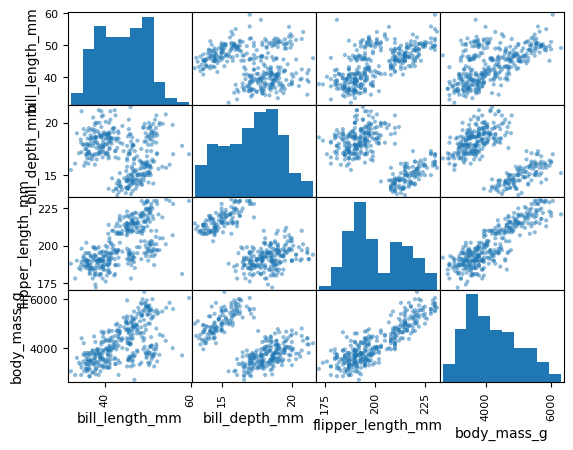

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(penguins_dataset)

# Turning String data into  Numerical data

In [14]:
penguins_dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [15]:
pandas.get_dummies(penguins_dataset["sex"])

,FEMALE,MALE
0,False,True
1,True,False
2,True,False
4,True,False
5,False,True
...,...,...
338,True,False
340,True,False
341,False,True
342,True,False


In [16]:
sex = penguins_dataset['sex'].apply(lambda x: 1 if x == 'FEMALE' else 0)
penguins_dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [17]:
sex.head()

0    0
1    1
2    1
4    1
5    0
Name: sex, dtype: int64

In [18]:
island = pandas.get_dummies(penguins_dataset["island"], drop_first=True)
island.head()

,Dream,Torgersen
0,False,True
1,False,True
2,False,True
4,False,True
5,False,True


In [19]:
penguins_dataset.drop(["sex", "island"], axis=1, inplace=True)
penguins_dataset = pandas.concat([penguins_dataset, sex, island], axis=1)

In [20]:
penguins_dataset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,False,True
1,Adelie,39.5,17.4,186.0,3800.0,1,False,True
2,Adelie,40.3,18.0,195.0,3250.0,1,False,True
4,Adelie,36.7,19.3,193.0,3450.0,1,False,True
5,Adelie,39.3,20.6,190.0,3650.0,0,False,True


In [50]:
array = penguins_dataset.values
X = array[:, 1:8]
Y = array[:, 0]
validation_size = 0.20
seed = 6

In [52]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

# Spot Check Algorithms

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

In [57]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

# Evaluate each model in turn

In [60]:
results = []
names = []

seed = 6
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

D:\Install\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Install\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.992450 (0.015103)
LDA: 0.996296 (0.011111)
KNN: 0.766667 (0.061797)
CART: 0.962251 (0.037333)
NB: 0.887607 (0.066283)
SVM: 0.744444 (0.052395)
RF: 0.988746 (0.023874)
ET: 0.992593 (0.014815)
